In [114]:
import tensorflow as tf


In [115]:
tf.__version__

'2.10.0'

In [116]:

print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))
print("Is GPU available:", tf.test.is_gpu_available())
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("Built with GPU support:", tf.test.is_built_with_gpu_support())


Num GPUs Available: 1
Is GPU available: True
Built with CUDA: True
Built with GPU support: True


In [117]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt




In [118]:


# Load pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [119]:
base_model.trainable=False

In [120]:
base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [121]:
from keras import models
from keras.models import Sequential
from keras.layers import Flatten,Dropout,Dense
# Add custom classification layers
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes (Normal, Tuberculosis, Pneumonia, COVID-19)



In [122]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 25088)             0         
                                                                 
 dense_27 (Dense)            (None, 256)               6422784   
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 4)                 516       
                                                                 
Total params: 21,170,884
Trainable params: 6,456,196
N

In [123]:
import keras

In [129]:
train_generator = keras.utils.image_dataset_from_directory(
    r'E:\Data\train',
    batch_size=32,
    image_size=(224, 224),  # Resize to match VGG16 expected input
    label_mode="categorical"
)

val_generator = keras.utils.image_dataset_from_directory(
    r'E:\Data\test',
    batch_size=32,
    image_size=(224, 224),  # Resize validation images too
    label_mode="categorical"
)


Found 8226 files belonging to 4 classes.
Found 1414 files belonging to 4 classes.


In [130]:
import tensorflow
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_generator.map(process)
validation_ds = val_generator.map(process)

In [131]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [132]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


258/258 [==============================] - 168s 389ms/step - loss: 0.5481 - accuracy: 0.7784 - val_loss: 0.3839 - val_accuracy: 0.8635
Epoch 2/10
258/258 [==============================] - 95s 361ms/step - loss: 0.2563 - accuracy: 0.9041 - val_loss: 0.3757 - val_accuracy: 0.8607
Epoch 3/10
258/258 [==============================] - 92s 351ms/step - loss: 0.2055 - accuracy: 0.9228 - val_loss: 0.3443 - val_accuracy: 0.8819
Epoch 4/10
258/258 [==============================] - 93s 356ms/step - loss: 0.1827 - accuracy: 0.9363 - val_loss: 0.3425 - val_accuracy: 0.8833
Epoch 5/10
258/258 [==============================] - 93s 357ms/step - loss: 0.1689 - accuracy: 0.9395 - val_loss: 0.3917 - val_accuracy: 0.8621
Epoch 6/10
258/258 [==============================] - 92s 352ms/step - loss: 0.1609 - accuracy: 0.9425 - val_loss: 0.3203 - val_accuracy: 0.8819
Epoch 7/10
258/258 [==============================] - 94s 359ms/step - loss: 0.1478 - accuracy: 0.9478 - val_loss: 0.4395 - val_accuracy: 0.

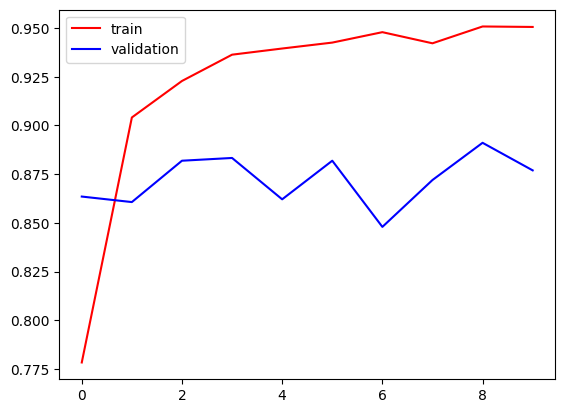

In [133]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [134]:
model.save('model1.h5')


In [ ]:

import pickle

# Save the training histor
# y
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Save the model in .tf format